

********************************************************************************************************************
Important information about the TILE used in the example

TILE_ID	20HNH
EPSG	32720
MGRS_REF	-33.439394673 -63 -33.434728825 -61.924235961 -34.336476415 -61.912856161 -34.341302723 -63
UTM_WKT	MULTIPOLYGON(((499980 6300040,499980 6190240,609780 6190240,609780 6300040,499980 6300040)))
LL_WKT	MULTIPOLYGON(((-63.0002151684396 -33.4390338826981,-63.0002176736835 -34.4293218469224,-61.8053036796643 -34.4234864167488,-61.8190497284114 -33.4334109930816,-63.0002151684396 -33.4390338826981)))

********************************************************************************************************************



In [1]:
pip install rasterio

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pip install pyproj

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install shapely

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
#asigning image value to variable
band4 = rasterio.open('images/B04.jp2', driver='JP2OpenJPEG')

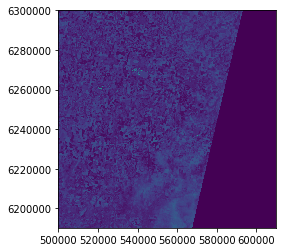

In [6]:
#showing image from variable
plot.show(band4)

Text(0, 0.5, 'Row #')

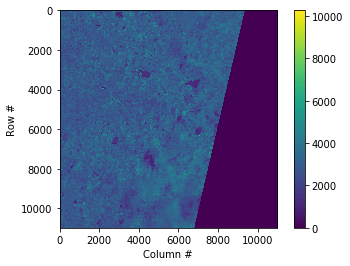

In [7]:
#changing points in image - NIR variable creation

band8 = rasterio.open('images/B08.jp2', driver='JP2OpenJPEG')
with band8 as src:
    oviews = src.overviews(1) # list of overviews from biggest to smallest
    oview = oviews[1]  # Use second-highest resolution overview
    #nir = src.read(1, out_shape=(1, int(src.height // oview), int(src.width // oview)))
    nir = src.read(1, out_shape=(1, int(src.height), int(src.width)))

plt.imshow(nir)
plt.colorbar()
plt.xlabel('Column #')
plt.ylabel('Row #')

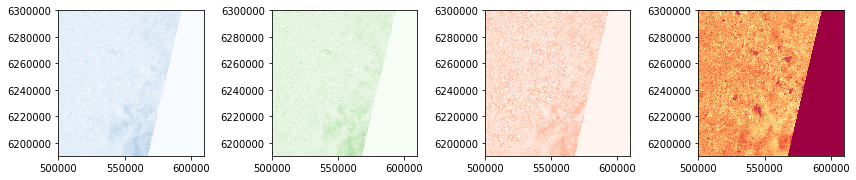

In [34]:
#assigning and showing all diferent images RGB + NIR

band3 = rasterio.open('images/B03.jp2', driver='JP2OpenJPEG')
band4 = rasterio.open('images/B04.jp2', driver='JP2OpenJPEG')
band2 = rasterio.open('images/B02.jp2', driver='JP2OpenJPEG')
band8 = rasterio.open('images/B08.jp2', driver='JP2OpenJPEG')
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(12,4))
plot.show(band2, ax=ax1, cmap='Blues')
plot.show(band3, ax=ax2, cmap='Greens')
plot.show(band4, ax=ax3, cmap='Reds')
plot.show(band8, ax=ax4, cmap='Spectral')
fig.tight_layout()

Decimation factor= 4


Text(0, 0.5, 'Row #')

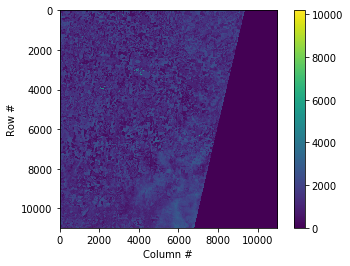

In [9]:
#changing points in image - RED variable creation

date = 'ML Example'

img = rasterio.open('images/B04.jp2', driver='JP2OpenJPEG')

with img as src:
    profile = src.profile
    oviews = src.overviews(1) # list of overviews from biggest to smallest
    oview = oviews[1]  # Use second-highest resolution overview
    print('Decimation factor= {}'.format(oview))
    #red = src.read (1, out_shape=(1, int(src.height // oview), int(src.width // oview)))
    red = src.read (1, out_shape=(1, int(src.height), int(src.width)))
plt.imshow(red)
plt.colorbar()
plt.xlabel('Column #')
plt.ylabel('Row #')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in true_divide


Text(0, 0.5, 'Row #')

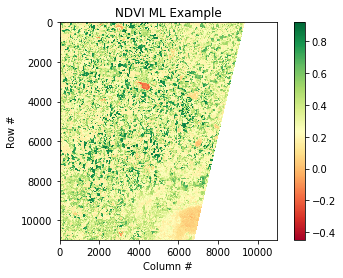

In [51]:
#NDVI calculation

def calc_ndvi(nir,red):
    '''Calculate NDVI from integer arrays'''
    nir = nir.astype('f4')
    red = red.astype('f4')
    ndvi = (nir - red) / (nir + red)
    return ndvi

ndvi = calc_ndvi(nir,red)
plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar()
plt.title('NDVI {}'.format(date))
plt.xlabel('Column #')
plt.ylabel('Row #')

In [54]:
#NDVI calculation over specific latitude/longitude + row/column search

import pyproj
with rasterio.open('images/B04.jp2', driver='JP2OpenJPEG') as src:
    # Use pyproj to convert point coordinates
    utm = pyproj.Proj(src.crs) # Pass CRS of image from rasterio
    lonlat = pyproj.Proj(init='epsg:4236')
    longitude = -62.13119516401269
    latitude = -33.7892713153716
    lon,lat = (longitude, latitude)
    east,north = pyproj.transform(lonlat, utm, lon, lat)

    print('NDVI\n-------')
    print(f'lon,lat=\t\t({lon:.2f},{lat:.2f})')
    print(f'easting,northing=\t({east:g},{north:g})')

    # What is the corresponding row and column in our image?
    row, col = src.index(east, north) # spatial --> image coordinates
    
    print(f'row,col=\t\t({row},{col})')

    #NDVI of the coordinates
    value2 = ndvi[row, col]
    print(f'ndvi=\t\t\t{value:.2f}')


    #NVDI of the ROW/COL info
    row, col = 100, 350
    east, north = src.xy(row,col) # image --> spatial coordinates
    lon,lat = pyproj.transform(utm, lonlat, east, north)
    value2 = ndvi[row, col]
    print(f'''
Interesting Feature
-------
row,col=          ({row},{col})
easting,northing= ({east:g},{north:g})
lon,lat=          ({lon:.2f},{lat:.2f})
ndvi=              {value2:.2f}
''')

NDVI
-------
lon,lat=		(-62.13,-33.79)
easting,northing=	(579612,6.2609e+06)
row,col=		(3914,7963)
ndvi=			0.52

Interesting Feature
-------
row,col=          (100,350)
easting,northing= (503485,6.29904e+06)
lon,lat=          (-62.95,-33.45)
ndvi=              0.15



/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pyproj/crs/crs.py:294: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:9: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/py

In [13]:
import numpy as np

In [14]:
#Info about the image

print ("image size, px:", band3.width, band3.height)
print ("Pixel size, m:", band3.transform[0], -band3.transform[4])
print ("Projection:", band3.crs)
print ("Image bounds:", band3.bounds)

image size, px: 10980 10980
Pixel size, m: 10.0 10.0
Projection: EPSG:32720
Image bounds: BoundingBox(left=499980.0, bottom=6190240.0, right=609780.0, top=6300040.0)


In [15]:
#RGB Image

def normalize(img):
    res = (img.astype(np.float32) - img.min())/(np.percentile(img, 99) - img.min())
    res[res>1.0] = 1.0
    return res
minX = 0
maxX = minX + 10980
minY = 0
maxY = minY + 10980
rgb = np.stack((normalize(band4.read(1)[minY:maxY, minX:maxX]),
               normalize(band3.read(1)[minY:maxY, minX:maxX]),
               normalize(band2.read(1)[minY:maxY, minX:maxX])), axis = -1)

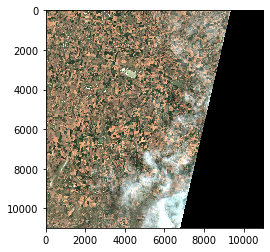

In [16]:
#plt.figure(figsize = (16,16))
plt.imshow(rgb)

In [59]:
#RGB image with zoom on specific place based on X/Y 

def normalize2(img):
    res = (img.astype(np.float32) - img.min())/(np.percentile(img, 99) - img.min())
    res[res>1.0] = 1.0
    return res
minX = 3800
maxX = minX + 300
minY = 7800
maxY = minY + 300
rgb2 = np.stack((normalize2(band4.read(1)[minY:maxY, minX:maxX]),
               normalize2(band3.read(1)[minY:maxY, minX:maxX]),
               normalize2(band2.read(1)[minY:maxY, minX:maxX])), axis = -1)

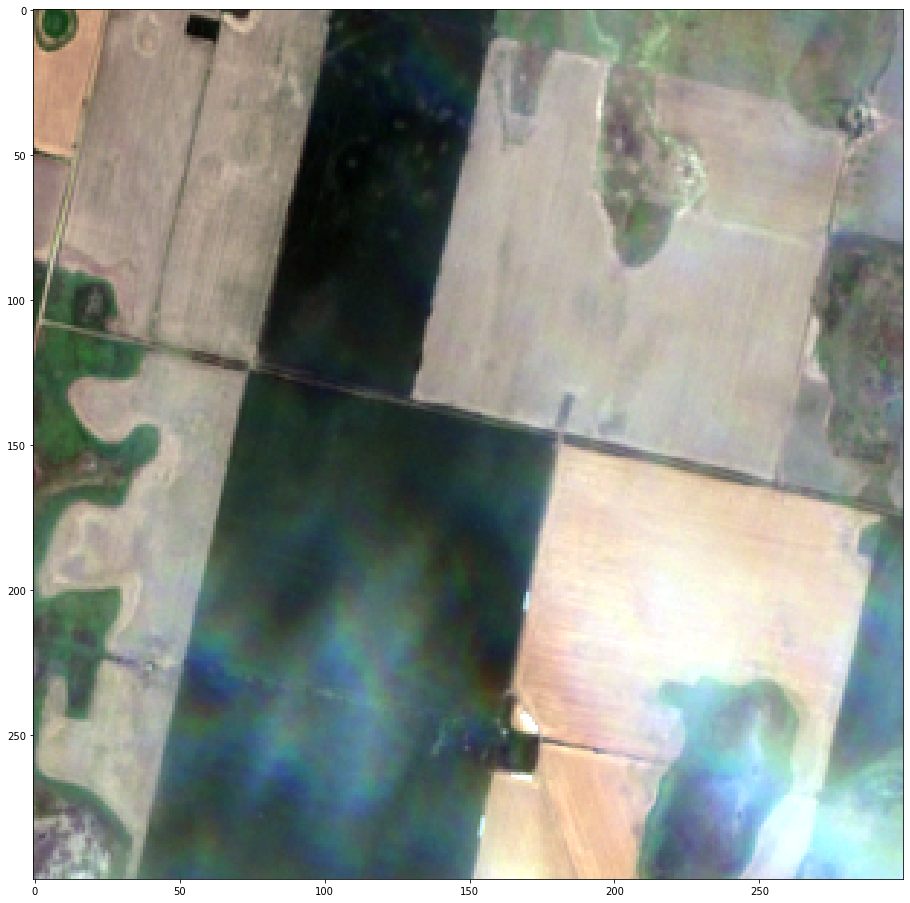

In [60]:
plt.figure(figsize = (16,16))
plt.imshow(rgb2)

Text(0, 0.5, 'Row #')

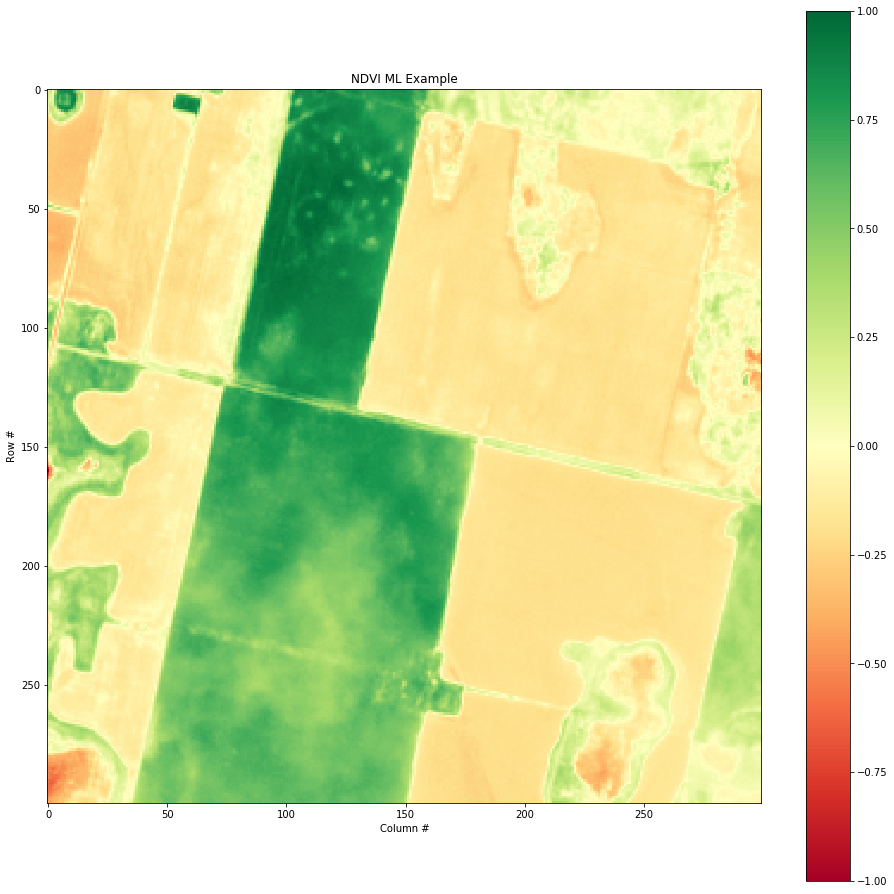

In [58]:
#NDVI image with zoom on specific place based on X/Y 

def calc_ndvi2(nir,red):
    '''Calculate NDVI from integer arrays'''
    minX = 3800
    maxX = minX + 300
    minY = 7800
    maxY = minY + 300
    imgnir =(band8.read(1)[minY:maxY, minX:maxX])
    nir2 = (imgnir.astype(np.float32) - imgnir.min())/(np.percentile(imgnir, 99) - imgnir.min())
    imgred = (band4.read(1)[minY:maxY, minX:maxX])
    red2 = (imgred.astype(np.float32) - imgred.min())/(np.percentile(imgred, 99) - imgred.min())
    ndvi2 = (nir2 - red2) / (nir2 + red2)
    return ndvi2

ndvi2 = calc_ndvi2(nir,red)
plt.figure(figsize = (16,16))
plt.imshow(ndvi2, cmap='RdYlGn')
plt.colorbar()
plt.title('NDVI {}'.format(date))
plt.xlabel('Column #')
plt.ylabel('Row #')

In [61]:
#NDVI results

row3=400
col3=420
value = ndvi2[row3, col3]
print(f'ndvi={value:.2f}')

IndexError: index 400 is out of bounds for axis 0 with size 300

Text(0, 0.5, 'Row #')

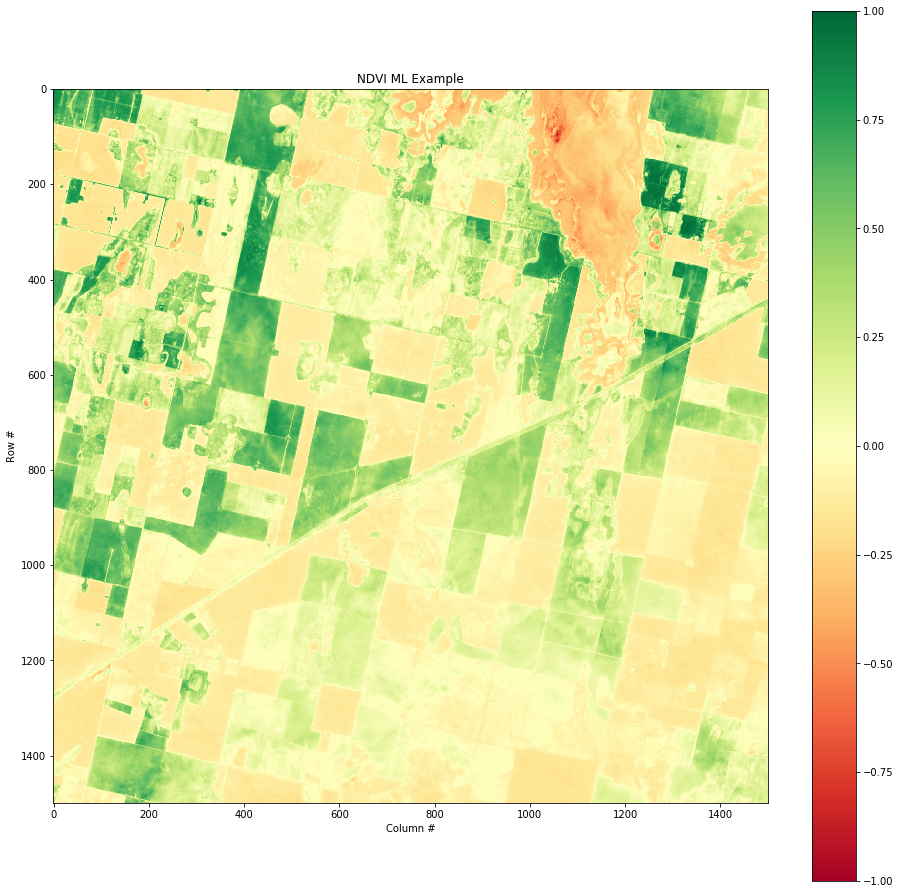

In [48]:
def calc_ndvi2(nir,red):
    '''Calculate NDVI from integer arrays'''
    minX = 3500
    maxX = minX + 1500
    minY = 7500
    maxY = minY + 1500
    imgnir =(band8.read(1)[minY:maxY, minX:maxX])
    nir2 = (imgnir.astype(np.float32) - imgnir.min())/(np.percentile(imgnir, 99) - imgnir.min())
    imgred = (band4.read(1)[minY:maxY, minX:maxX])
    red2 = (imgred.astype(np.float32) - imgred.min())/(np.percentile(imgred, 99) - imgred.min())
    ndvi2 = (nir2 - red2) / (nir2 + red2)
    return ndvi2

ndvi2 = calc_ndvi2(nir,red)
plt.figure(figsize = (16,16))
plt.imshow(ndvi2, cmap='RdYlGn')
plt.colorbar()
plt.title('NDVI {}'.format(date))
plt.xlabel('Column #')
plt.ylabel('Row #')